In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [67]:
data = pd.read_csv('Lab2_Data/DF1')

print(data)

x0 = data['0']
x1 = data['1']
x2 = data['2']
x3 = data['3']

      Unnamed: 0         0         1         2         3
0              0  1.038502  0.899865  0.835053 -0.971528
1              1  0.320455 -0.647459  0.149079  0.352593
2              2  0.055480  2.234771  0.271672 -2.108739
3              3 -0.007260 -0.524299 -0.126550  0.670827
4              4 -1.237390 -1.377017 -1.049932  1.342079
...          ...       ...       ...       ...       ...
9995        9995 -0.632309 -0.145873 -0.797517  0.436184
9996        9996  0.679417 -0.530216  0.526470  0.439397
9997        9997  0.890697 -2.210855  1.072751  2.285372
9998        9998  0.475293  0.490971  0.536909 -0.195772
9999        9999  1.207406  0.819239  1.230797 -0.752397

[10000 rows x 5 columns]


Scatterplots using Pandas:

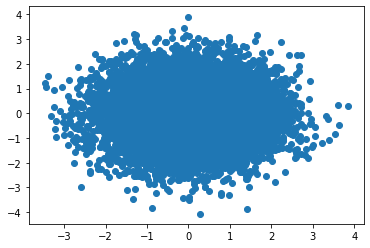

In [51]:
plt.scatter(x0, x1)

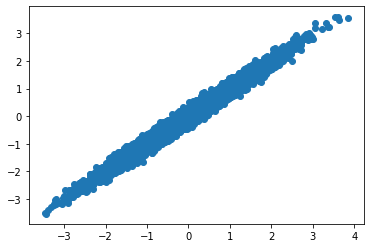

In [52]:
plt.scatter(x0, x2)

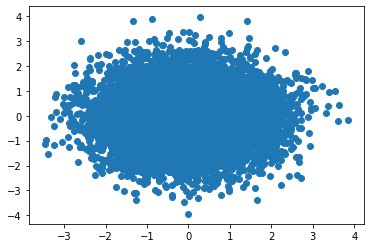

In [53]:
plt.scatter(x0, x3)

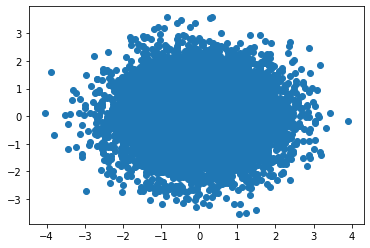

In [54]:
plt.scatter(x1, x2)

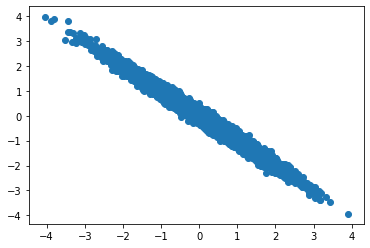

In [55]:
plt.scatter(x1, x3)

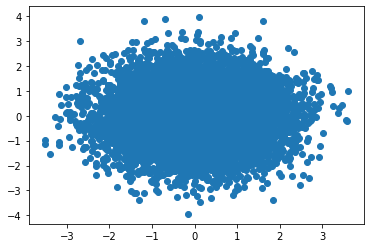

In [56]:
plt.scatter(x2, x3)

Scatterplots using Seaborn:

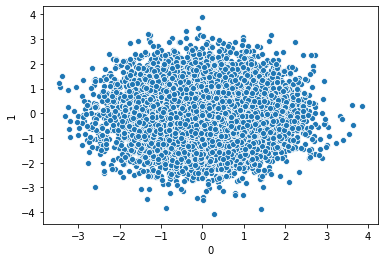

In [57]:
sns.scatterplot(x="0", y="1", data=data)

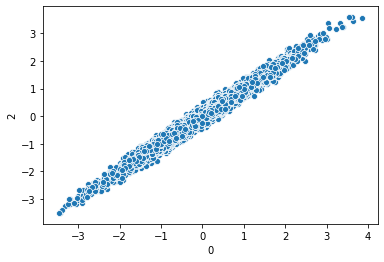

In [58]:
sns.scatterplot(x="0", y="2", data=data)

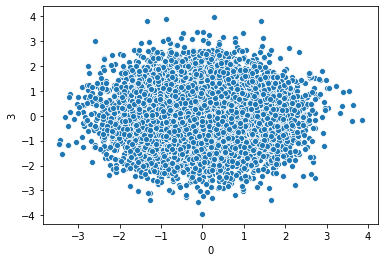

In [59]:
sns.scatterplot(x="0", y="3", data=data)

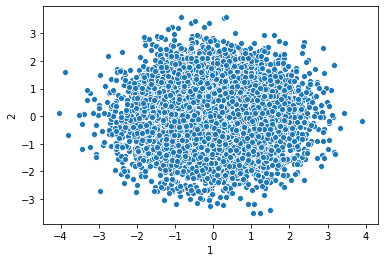

In [60]:
sns.scatterplot(x="1", y="2", data=data)

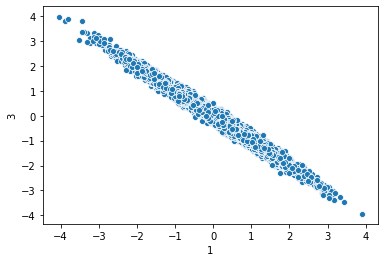

In [61]:
sns.scatterplot(x="1", y="3", data=data)

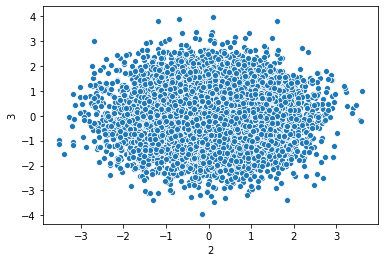

In [62]:
sns.scatterplot(x="2", y="3", data=data)

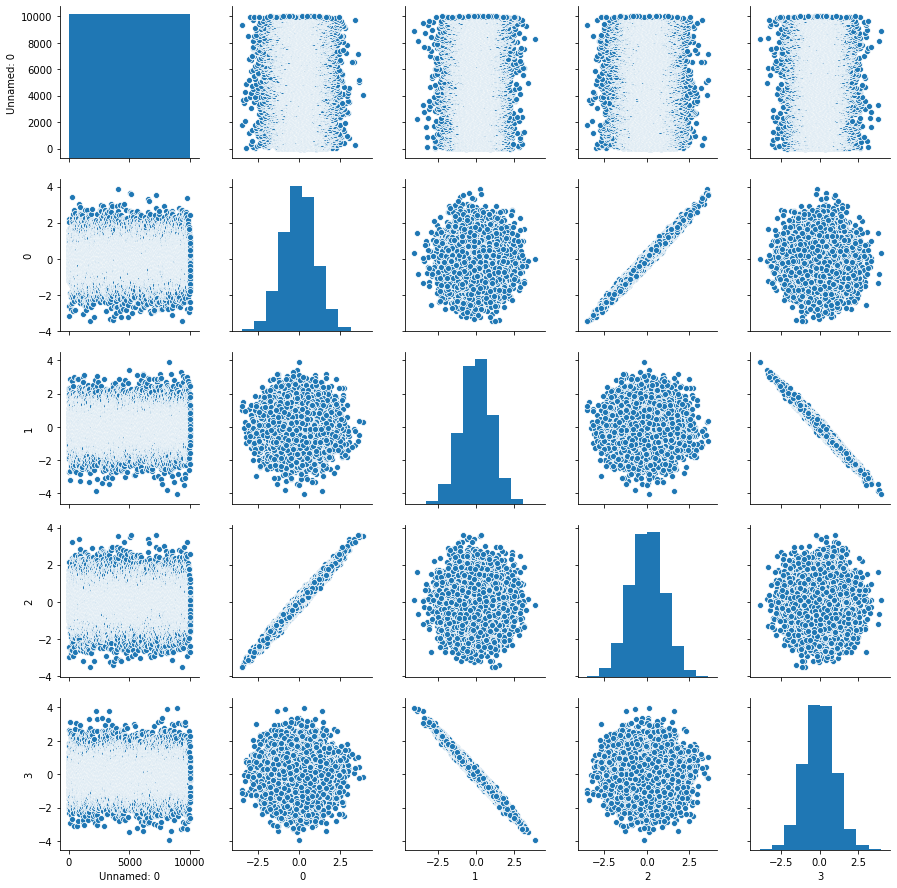

In [126]:
sns.pairplot(data)

From the Pandas and Seaborn scatterplots we can see:
    - Column 0 and column 2 are positively correlated 
    - Column 1 and column 3 are negatively correlated

Covariance Matrix:
[[cov(x0, x0) cov(x0, x1) cov(x0, x2) cov(x0, x3)],
 [cov(x1, x0) cov(x1, x1) cov(x1, x2) cov(x1, x3)],
 [cov(x2, x0) cov(x2, x1) cov(x2, x2) cov(x2, x3)],
 [cov(x3, x0) cov(x3, x1) cov(x3, x2) cov(x3, x3)]]
 
 Note that the elements on the main diagonal are the covariances of each variable with itself which is simply the variance of each variable (i.e. cov(x0, x0) = var(x0))

In [88]:
newData = data.loc[:, '0':'3']
covMatrix = np.cov(np.transpose(newData))
print("Covariance Matrix:\n", covMatrix)

Covariance Matrix:
 [[ 1.00155793 -0.00401176  0.99162409  0.00412485]
 [-0.00401176  1.00537841 -0.00409877 -0.99545662]
 [ 0.99162409 -0.00409877  1.00158867  0.00408108]
 [ 0.00412485 -0.99545662  0.00408108  1.00516828]]


As we can see from the matrix, column 0 and column 2 are strongly correlated with a value of 0.99162409 and it is a positive number, showing that they are positively correlated. Likewise, column 1 and 3 have a covariance of -0.9954662 which shows that they are strongly negatively correlated. The other values, other than the main diagonal, show that the other combinations of columns are not correlated with one another as the values are very small. 

In [103]:
mean = [0, 0, 0]
cov = [[1, 0, 0],
      [ 0, 1, 1],
      [ 0, 1, 1]]
n = 5
gaussian = np.random.multivariate_normal(mean, cov, n)

In [110]:
np.cov(np.transpose(gaussian))

array([[9.99897874e-01, 9.97939504e-05, 9.97939493e-05],
       [9.97939504e-05, 9.99755846e-01, 9.99755846e-01],
       [9.97939493e-05, 9.99755846e-01, 9.99755846e-01]])

[0.37550575327163505, 3.784126513566414, 0.3721001641195539, 1.0146788396700621, 1.342468626753972, 1.1760623794677618, 0.8196058065677809, 1.0822736053260082, 0.9913243294049584, 1.0260948259800962]


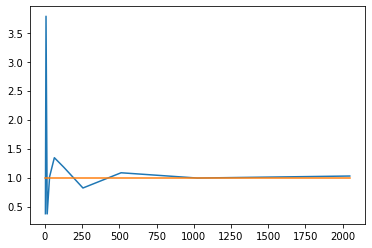

In [125]:
n = 2
estimatedValues = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nValues = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
trueValues = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
for i in range(10):
    gaussian = np.random.multivariate_normal(mean, cov, n)
    n *= 2
    covMatrix = np.cov(np.transpose(gaussian))
    estimatedValues[i] = covMatrix[0][0]
    nValues[i] = n
    
print(estimatedValues)

plt.plot(nValues, estimatedValues)
plt.plot(nValues, trueValues)